In [71]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 

from sklearn.model_selection import train_test_split 

In [25]:
df = sb.load_dataset("iris") 
print(df.head())
print(df.info())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


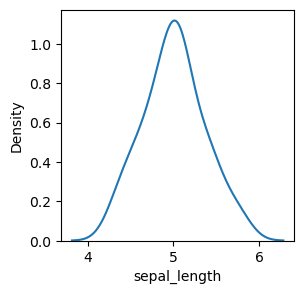

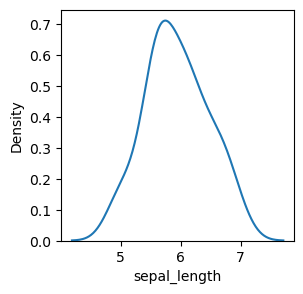

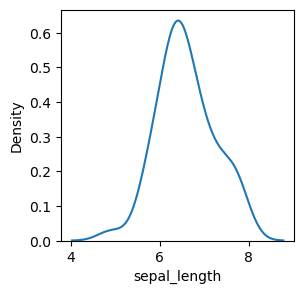

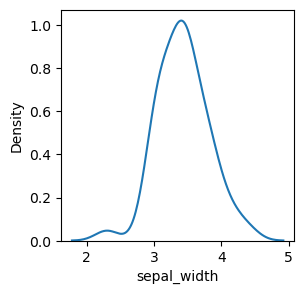

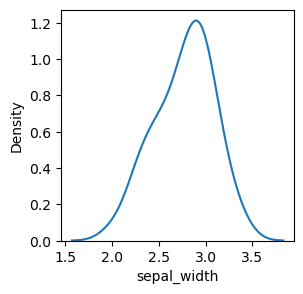

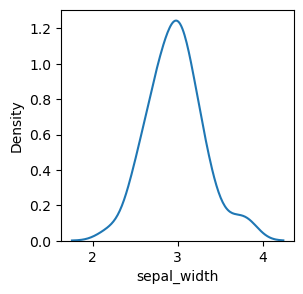

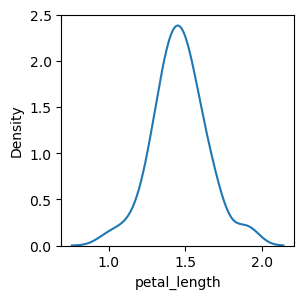

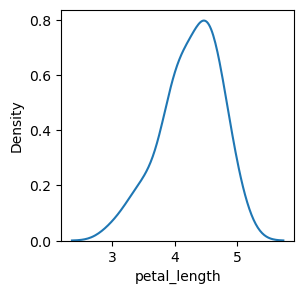

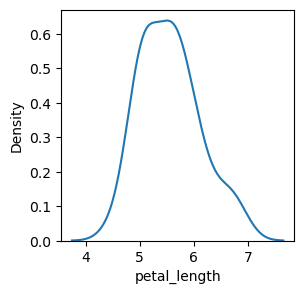

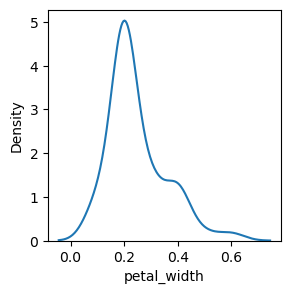

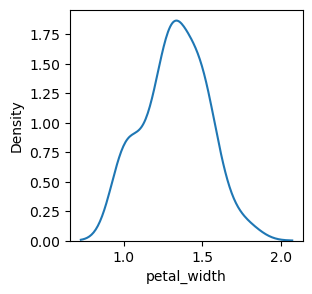

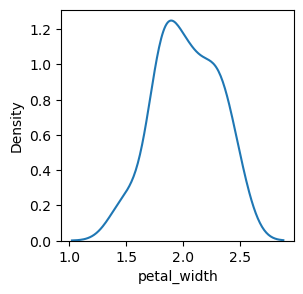

In [21]:
classes= df["species"].unique() 
Xdf=df.drop("species",axis=1)
for f in Xdf:
    for c in classes:
        classDf = df.loc[df.loc[:,"species"]==c,f]
        plt.figure(figsize=(3,3))
        sb.kdeplot(data=classDf)
        plt.show()

In [22]:
def gaussian(mean,std,x):
    return np.exp( -(((x-mean)*(x-mean))/(2*std*std)) )/(np.sqrt(2*np.pi)*std)

In [86]:
Xdf = df.drop(["species"],axis=1)
Ydf = df["species"]

In [124]:
def mle(Xdf,Ydf):
    labels= Ydf.unique()
    result={}
    n=len(Xdf)
    for f in Xdf:
        result[f]={}
        for l in labels:
            data = [Xdf.loc[i,f] for i in range(n) if Ydf.iloc[i]==l]
            result[f][l]=(np.mean(data), np.std(data))
    return result

In [88]:
def priorProbability(Ydf):
    labels= Ydf.unique()
    Y=list(Ydf.values)
    n=Ydf.count()
    result={}
    for l in labels:
        result[l]=Y.count(l)/n
    return result

In [133]:
def predict(priors, featureEstimates, x, labels,features):
    result=(0,-1e15)
    for l in labels:
        posterior = np.log(priors[l])
        for f in features:
            mean,std = featureEstimates[f][l]
            xi = x[f]
            posterior += np.log(np.clip(gaussian(mean,std,xi), 1e-15, 1-1e-15))
        if(posterior>result[1]):
            result=(l,posterior)
    return result[0]

# predict(priorProbability(Ydf), mle(Xdf,Ydf),Xdf.loc[110,:],Ydf.unique(),Xdf.columns)

In [134]:
Xdf = df.drop(["species"],axis=1)
Ydf = df["species"]
X_train, X_test, Y_train, Y_test = train_test_split(Xdf, Ydf, random_state=42, stratify=Ydf, test_size=0.2)

<Axes: xlabel='Percentage', ylabel='Accuracy'>

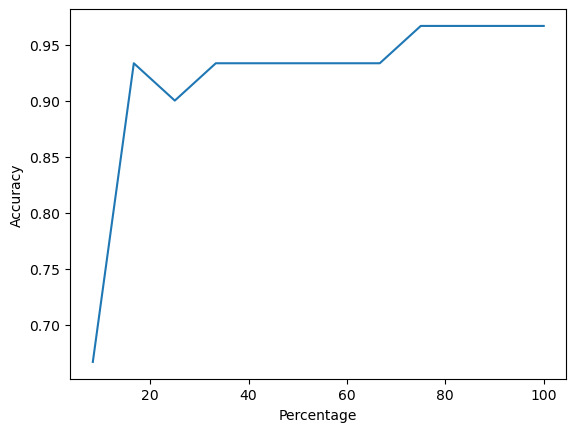

In [138]:
Y_test=Y_test.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
accuracy_val=[] 
percentageData=[]
for i in range(10,len(X_train)+1,10):
    Xdf = X_train.iloc[0:i,:].reset_index(drop=True)
    Ydf = Y_train.iloc[0:i].reset_index(drop=True)
    priors=priorProbability(Ydf)
    featureEstimates=mle(Xdf,Ydf)
    accuracy=[Y_test.values[i] == predict(priors,featureEstimates,X_test.loc[i,:],Ydf.unique(),Xdf.columns) for i in range(len(Y_test))]
    accuracy_val.append(np.mean(accuracy))
    percentageData.append(100*i/len(X_train))

accuracyDF=pd.DataFrame({"Accuracy":accuracy_val,"Percentage":percentageData})
sb.lineplot(data=accuracyDF, x="Percentage",y="Accuracy")